In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv('advanced_weather_air_quality.csv')
df.head()

,timestamp,city,temperature_C,humidity_%,air_quality_index,weather_condition
0,2023-01-01 00:00:00,Johannesburg,24.5,82,101,Sunny
1,2023-01-01 00:00:00,Cape Town,21.3,60,132,Sunny
2,2023-01-01 00:00:00,Durban,17.4,50,117,Rainy
3,2023-01-01 00:00:00,Pretoria,21.4,75,133,Cloudy
4,2023-01-01 00:00:00,Bloemfontein,19.1,60,87,Cloudy


# 1.Explore the Dataset

### Grouping by timestamp and calculating mean for numerical columns

In [23]:

hourly_data = df.groupby('timestamp').mean(numeric_only=True)

### Identifying Weather conditions using mode


In [24]:
weather_conditions = df.groupby('timestamp')['weather_condition'].agg(lambda x: x.mode()[0])

### Combining the numerical data with weather conditions

In [25]:
combined_data = pd.concat([hourly_data, weather_conditions], axis=1)
combined_data.rename(columns={'weather_condition': 'Weather Condition'}, inplace=True)
combined_data.head()

,temperature_C,humidity_%,air_quality_index,Weather Condition
timestamp,,,,
2023-01-01 00:00:00,20.74,65.4,114.0,Cloudy
2023-01-01 01:00:00,20.88,63.2,74.4,Foggy
2023-01-01 02:00:00,21.14,73.0,77.8,Sunny
2023-01-01 03:00:00,22.22,56.2,118.2,Foggy
2023-01-01 04:00:00,22.50,62.0,110.0,Cloudy


# 2.Cleaning The Data

#### Checking for missing values

In [26]:

print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
timestamp            0
city                 0
temperature_C        0
humidity_%           0
air_quality_index    0
weather_condition    0
dtype: int64


#### Droping duplicates if any


In [27]:

df.drop_duplicates(inplace=True)


#### Converting 'timestamp' column to datetime

In [28]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

#### Confirming changes

In [29]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())
print("\nData types after cleaning:")
print(df.dtypes)


Missing values after cleaning:
timestamp            0
city                 0
temperature_C        0
humidity_%           0
air_quality_index    0
weather_condition    0
dtype: int64

Data types after cleaning:
timestamp            datetime64[ns]
city                         object
temperature_C               float64
humidity_%                    int64
air_quality_index             int64
weather_condition            object
dtype: object


# 3. Data Analysis

### A. Find which city had the cleanest and most polluted air.

In [30]:
# average air quality index for each city
city_aqi = df.groupby('city')['air_quality_index'].mean()

#city with the cleanest and most polluted air
cleanest_city = city_aqi.idxmin()
most_polluted_city = city_aqi.idxmax()

print(f"The city with the cleanest air is {cleanest_city}.")
print(f"The city with the most polluted air is {most_polluted_city}.")

The city with the cleanest air is Cape Town.
The city with the most polluted air is Pretoria.


### B. Checking if bad weather (like fog or storms) usually comes with high AQI.

#### Grouping by weather condition and calculating mean AQI


In [31]:
bad_weather_aqi = df.groupby('weather_condition')['air_quality_index'].mean()

#### Avarage AQI for each weather condition

In [32]:
print("Average AQI for each weather condition:")
print(bad_weather_aqi)

Average AQI for each weather condition:
weather_condition
Cloudy    102.774148
Foggy     104.108635
Rainy     102.478738
Stormy    104.978552
Sunny     108.192090
Name: air_quality_index, dtype: float64


#### Air Quality By Each Hour


In [33]:
print("Air Quality by Each Hour:")
print(hourly_data['air_quality_index'])

Air Quality by Each Hour:
timestamp
2023-01-01 00:00:00    114.0
2023-01-01 01:00:00     74.4
2023-01-01 02:00:00     77.8
2023-01-01 03:00:00    118.2
2023-01-01 04:00:00    110.0
                       ...  
2023-01-30 20:00:00    117.6
2023-01-30 21:00:00     97.4
2023-01-30 22:00:00     97.4
2023-01-30 23:00:00    114.2
2023-01-31 00:00:00     99.8
Name: air_quality_index, Length: 721, dtype: float64


### C. Compare temperature and humidity with air quality.


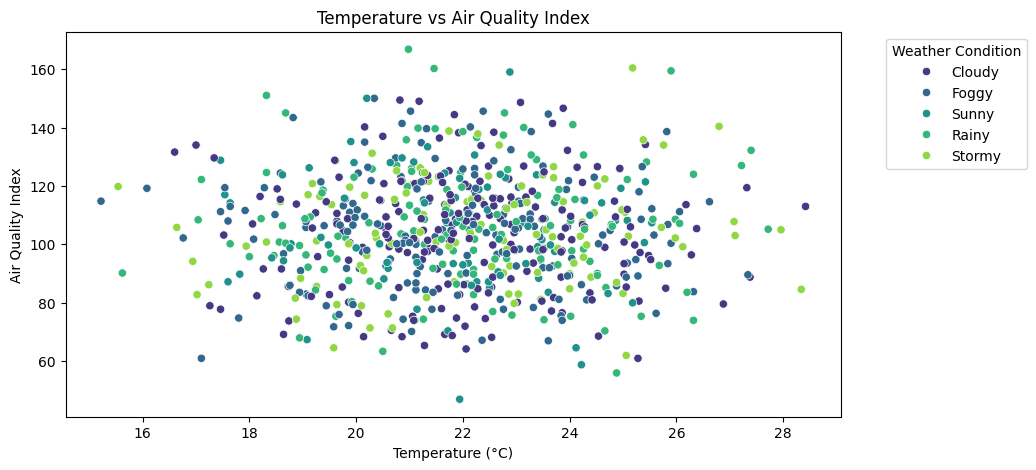

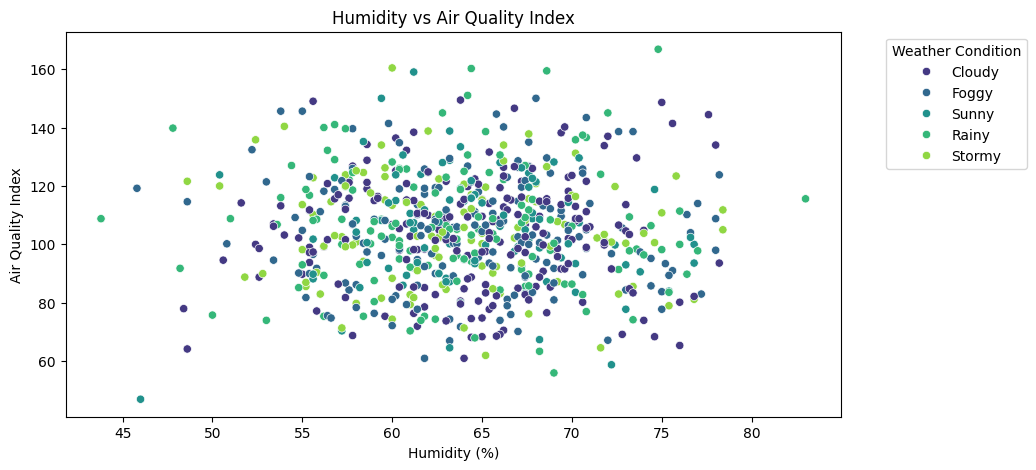

In [34]:
# Scatter plot for temperature vs air quality
plt.figure(figsize=(10, 5))
sns.scatterplot(data=combined_data, x='temperature_C', y='air_quality_index', hue='Weather Condition', palette='viridis')
plt.title('Temperature vs Air Quality Index')
plt.xlabel('Temperature (°C)')
plt.ylabel('Air Quality Index')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Scatter plot for humidity vs air quality
plt.figure(figsize=(10, 5))
sns.scatterplot(data=combined_data, x='humidity_%', y='air_quality_index', hue='Weather Condition', palette='viridis')
plt.title('Humidity vs Air Quality Index')
plt.xlabel('Humidity (%)')
plt.ylabel('Air Quality Index')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### D. Weather Patterns

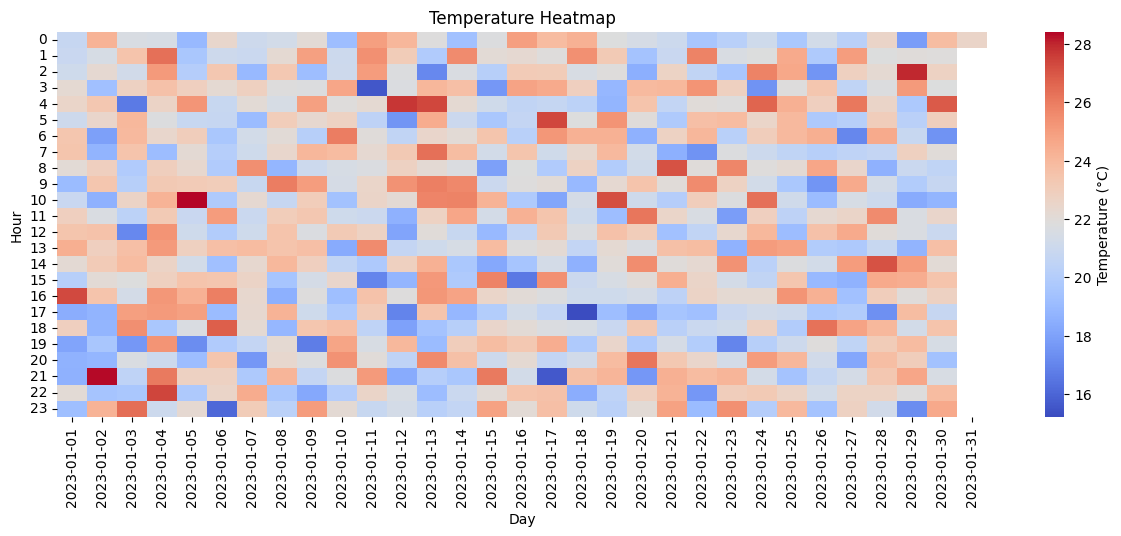

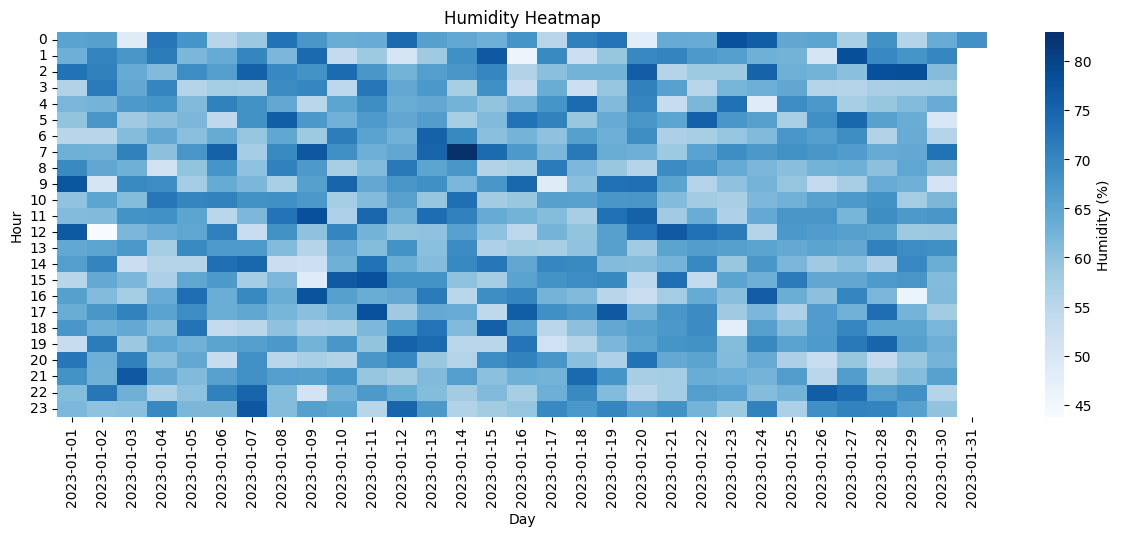

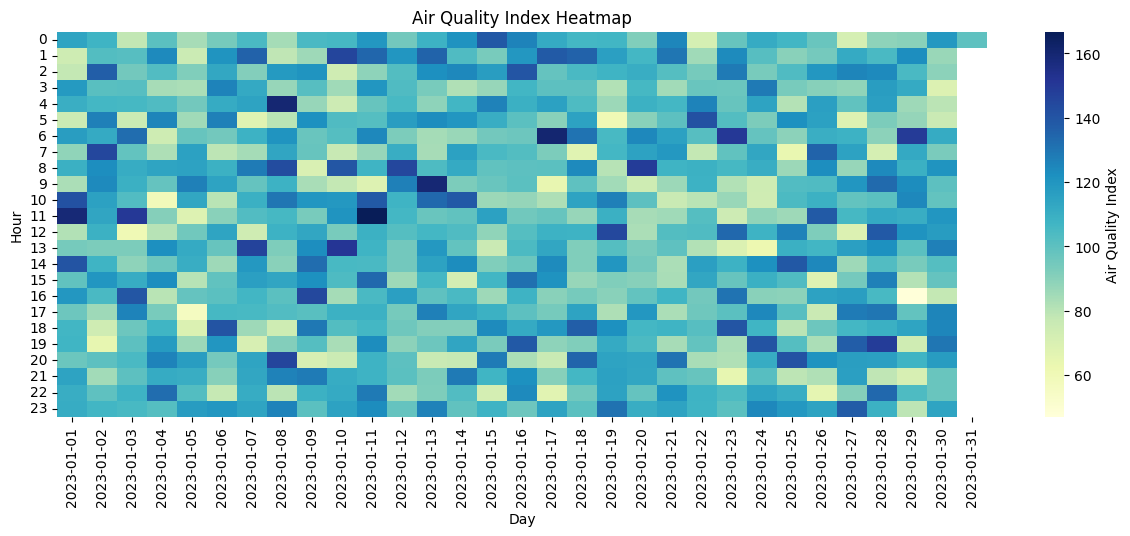

In [35]:
heatmap_data = hourly_data.reset_index()
heatmap_data['timestamp'] = pd.to_datetime(heatmap_data['timestamp'])

heatmap_data['hour'] = heatmap_data['timestamp'].dt.hour
heatmap_data['day'] = heatmap_data['timestamp'].dt.date


temperature_pivot = heatmap_data.pivot(index='hour', columns='day', values='temperature_C')
humidity_pivot = heatmap_data.pivot(index='hour', columns='day', values='humidity_%')
aqi_pivot = heatmap_data.pivot(index='hour', columns='day', values='air_quality_index')


plt.figure(figsize=(15, 5))
sns.heatmap(temperature_pivot, cmap='coolwarm', cbar_kws={'label': 'Temperature (°C)'})
plt.title('Temperature Heatmap')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.show()

plt.figure(figsize=(15, 5))
sns.heatmap(humidity_pivot, cmap='Blues', cbar_kws={'label': 'Humidity (%)'})
plt.title('Humidity Heatmap')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.show()

plt.figure(figsize=(15, 5))
sns.heatmap(aqi_pivot, cmap='YlGnBu', cbar_kws={'label': 'Air Quality Index'})
plt.title('Air Quality Index Heatmap')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.show()

### E. Line graphs for AQI changes per city

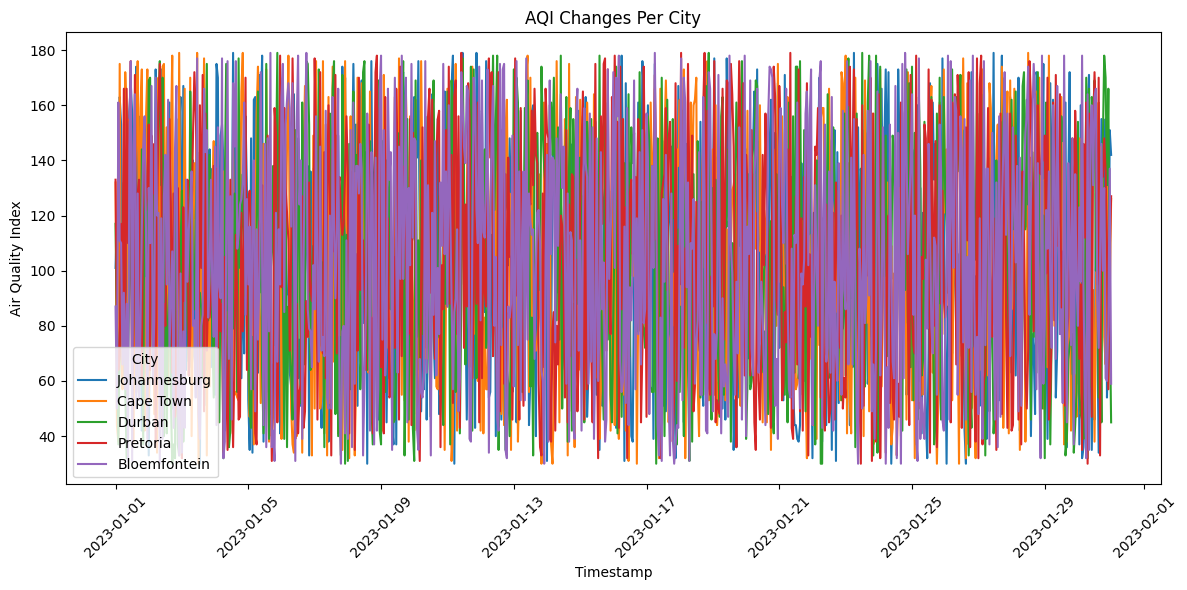

In [36]:
plt.figure(figsize=(12, 6))

for city in df['city'].unique():
    city_data = df[df['city'] == city]
    plt.plot(city_data['timestamp'], city_data['air_quality_index'], label=city)

plt.title('AQI Changes Per City')
plt.xlabel('Timestamp')
plt.ylabel('Air Quality Index')
plt.legend(title='City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Summary

#### Summary of Findings: 

The city with the cleanest air is Cape Town
The city with the most polluted air is Pretoria
Certain weather conditions, such as fog or storms, are associated with higher average AQI, indicating poorer air quality during these times.
Higher temperatures and humidity levels can sometimes correlate with changes in air quality, as seen in the scatter plots.
AQI varies throughout the day and by city, as shown in the line graphs and heatmaps.


#### Advice:
The safest time to go outside is when the AQI is lowest, which is often during clear weather conditions and outside of peak pollution hours (typically early morning or late evening).
Avoid outdoor activities during foggy, stormy, or otherwise poor weather conditions, as these are linked to higher air pollution levels.
Check your local AQI and weather reports before planning outdoor activities, especially if you are sensitive to air quality.